<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Lections/L04_SVM_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

## Лекция 4

### Метод опорных векторов. Гиперпараметры и валидация.

# Метод опорных векторов

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Сегодня мы обсудим метод классического обучения, который, несмотря на то, что был предложен очень давно, до сих пор решает некоторые задачи на удивление с хорошим качеством.

Начнем мы с посмотрим на вот такой игрушечный пример с датасетом, хранящим информацию о ирисах



Построим график, на котором отложим то, как делятся виды setosa и versicolor по длине и ширине лепестка  

In [ ]:
iris= datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
def plot_2iris(iris= datasets.load_iris()):
  X = iris["data"][:, (2, 3)]  # petal length, petal width
  y = iris["target"]
  setosa_or_versicolor = (y == 0) | (y == 1)
  X = X[setosa_or_versicolor]
  y = y[setosa_or_versicolor]
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
  plt.ylabel("Petal width", fontsize=14)
  plt.xlabel("Petal length", fontsize=14)
  plt.axis([0, 5.5, 0, 2])

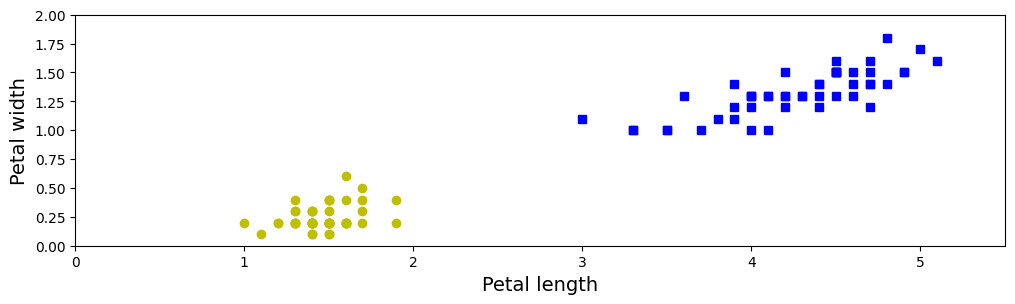

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.show()

Видим, что разделение идеально.
Но мы хотим для любого цвветка, померив длину и ширину лепестка, говорить точно - к какому из двух видов он относится. Нам нужно провести границу - **решающую границу**, с одной стороны от которой мы говорим, что цветок - setosa, а с другой - versicolor

Но как ее провести?

Можно так:

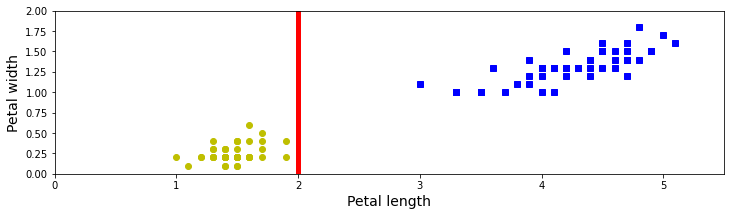

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.axvline(x=2, ymin = 0, ymax = 2, color="red", linewidth=5)
plt.show()

Или так

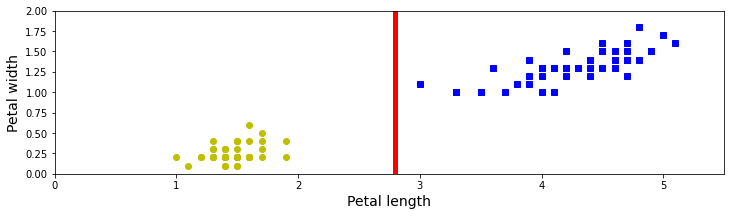

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.axvline(x=2.8, ymin = 0, ymax = 2, color="red", linewidth=5)
plt.show()

Вообще говоря, можно проводить не только горизонтальные линии. Можно и с наклоном

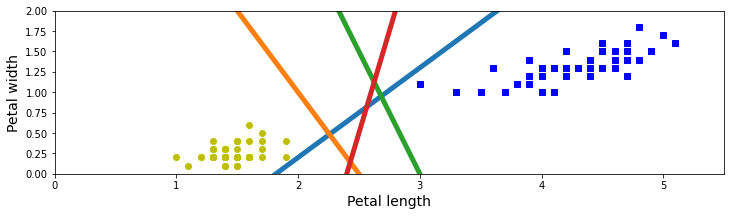

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
x0 = np.linspace(0, 5, 200)
for (b, k) in ((1.1, 2), (-2, -5), (-3, -9), (5, 12)):
  y0 = b * x0 - k
  plt.plot(x0, y0, linewidth=5)
plt.show()

## Maximum margin classifier

Мы хотим провести такую разделяющую границу, чтобы минимальное расстояние между ней и объектом из нашей обучающей выборки было максимально

$$\max_b \min dist(x, b)$$

$$ \min dist(x, b) $$ называется **зазором** (margin)

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

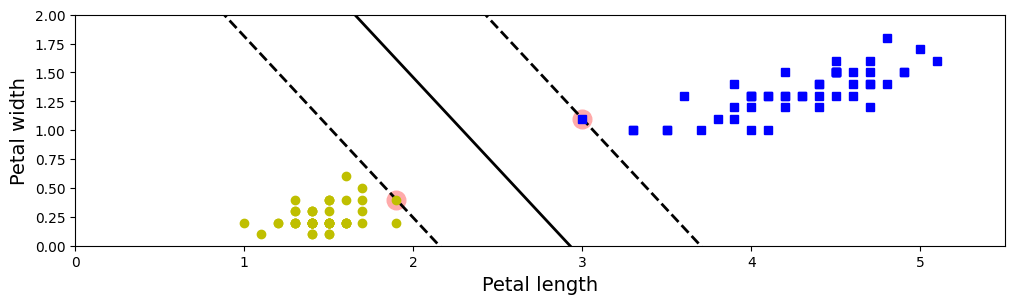

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
svm_clf.fit(X, y)

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,3))
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plot_2iris()
plt.show()

Вроде бы все работает замечательно. Но что произойдет, если мы добавим один выброс - цветок, который мы разметили неверно?

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=inf, kernel='linear')

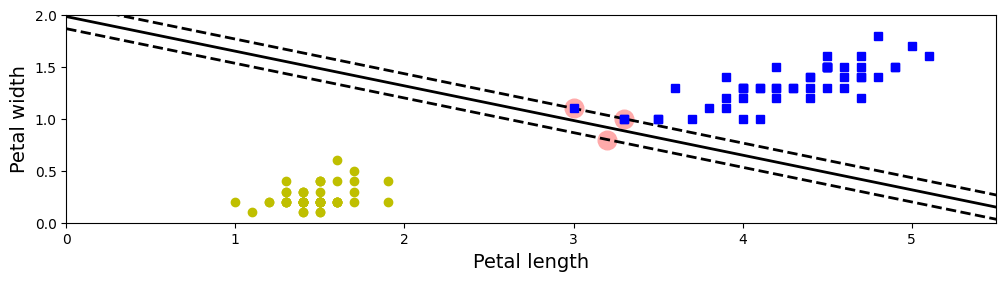

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plot_2iris()
plt.axis([0, 5.5, 0, 2])
plt.show()

Наше решение очень сильно поменялось. Всего из-за одного выброса. У наше модели большой variance - она чувствительна к шуму в данных.


Более того, мы можем добавить такой выброс, что мы в принципе не сможем провести прямую, которая однозначно разделит точки

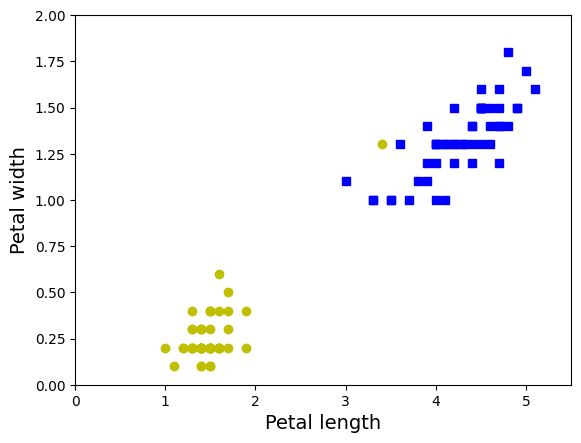

In [ ]:
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

## Soft Margin Classifier = Support Vector Classifier

Разрешим нашей модели частично игнорировать выбросы. Пусть за то, насколько сильно модель может проигнорировать выбросы, будет отвечать параметр C. Чем он больше - тем бОльший штраф мы даем за любой объект, который лежит не с той стороны обучающей выборки

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/svm_c.png" width="400">

В такой постановке разделение возможно

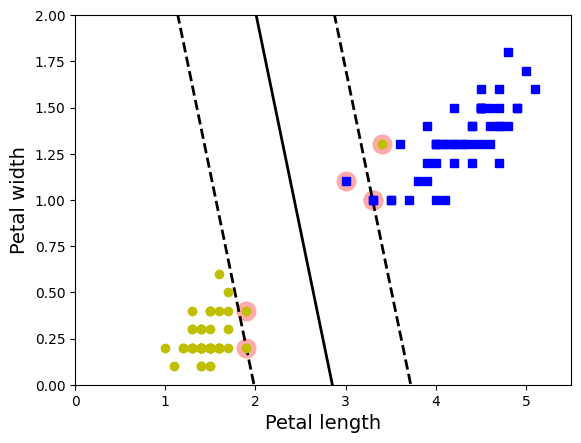

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_out, y_out)

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Меняя параметр C, мы будем менять и чувствительность нашего решения к шуму - чем больше C - больше мы реагируем на шум

## Метод опорных векторов

По сути мы с вами получили метод опорных векторов. Остается один вопрос - а почему метод вдруг назван методом **опорных векторов**

support vectors

Оказыввается, то, с какой стороны от решающей границы лежит объект, который мы классифицируем определяется методом на основании **decision function**. Если ее значение меньше 0 - объект лежит со стороны нулевого класса, больше - со стороны 1 класса.



Сама же функция вычисляется по следующей формуле:

$$ decision_j = \sum_{i \in train\_objects} c_i y_i <x_i, x_j> + b $$



Что в ней написано?

Для определения решения для некоего объекта j, мы считаем сумму его скалярных произведений с объектами выборки, умноженными на некий коэффициент $c_i$ и метку класса $y_i$.

Скалярное произведение мы считаем в пространстве признаков наших объектов.

y_i принимает значение -1 для объектов нулевого класса и +1 для позитивного

Остается разобраться с $c_i$


Этот коэффиент равен 0 почти для всех обхектов из тренировочной выборки кроме тех, что определяют границу (на рисунке подсвечены)

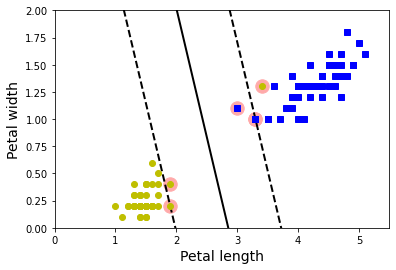

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_out, y_out)

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Все объекты, у которых $c_i != 0$ и называются опорными векторами. Формула может быть переписана, тем самым, следующим образом:

$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$



То есть решение о принадлежности объекта к тому или иному классу выносится на основе (обычно) малой части тренировочной выборке - опорных векторах - потому метод и называется методом опорных векторов

## Переход в пространство большей размерности

Представим себе, что в исходном пространстве признаков наши объекты в принципе неразделимы.






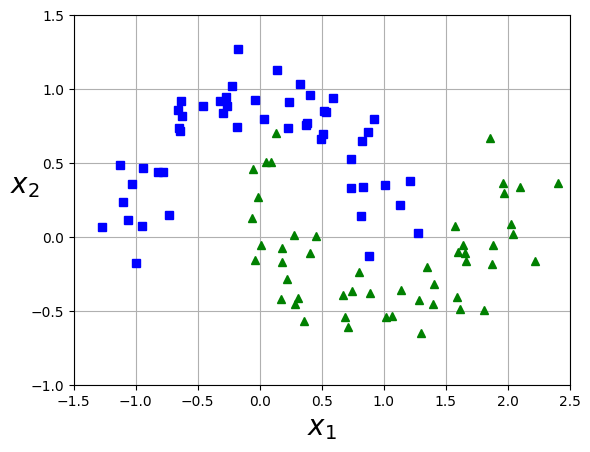

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Тогда кажется разумным перейти в пространство бОльшей размерности и уже там применить наш метод.


Например, можно взять и вместо исходных признаков

$$x_1, x_2$$

применять их комбинации вплоть до третьей степени получающегося полинома

$x_1,~x_2,~x_1^2,~x_2^2,~x_1x_2, ~x_1^2x_2,~x_2^2x_1,~x_1^3,~x_2^3 $

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


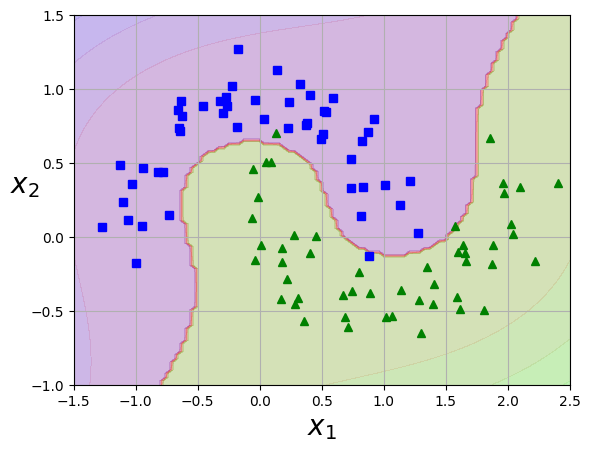

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Подход работает, но есть один нюанс.

Что произойдет, если пространство признаков, в которое нам надо перейти - велико, и объектов у нас много?

Скорее всего - мы просто не сможем обучить модель. Кончится оперативная память и все упадет.

### Kernel trick

Но в случае SVM за счет того, что функция решений выглядит следующим образом:

$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$

можно сделать иначе. Для подсчета ее значения нам не нужно знать, как выглядят объекты в пространстве бОльшей размерности, а только уметь узнавать скалярное произведение между ними.

Оказывается, в некоторых случаях это можно делать, не переходя в это пространство, а вычисляя специальную **kernel function**

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/svm_kernel_trick.png" width="500">

Примеры ядер :

* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ - полиномиальное ядро, считает расстояние между объектами в пространстве размерности d

* $k(x_i, x_j)=\exp\left(-\gamma\|x_i-x_j\|^2\right)$ — радиальная базисная функция RBF





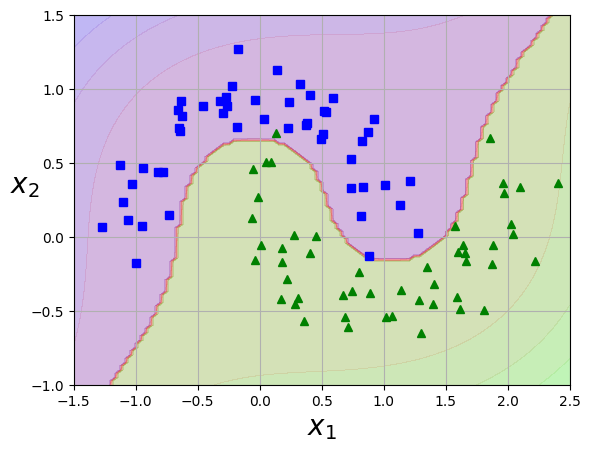

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)



clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
    ])

clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Переход от бинарной классификации к мультиклассовой

Напрямую, мы не можем при помощи такого SVM решить задачу классификацию, отличную от бинарной. Поэтому чаще всего SVM упоминается в контекста бинарной классификации.

Однако существуют подходы, позволяющие использовать SVM и для мультиклассовой классификации

Один из них состоит в обучении множества бинарных классификаторов отличать:
1. класс 0 от остальных
2. класс 1 от остальных
3. ....

И далее выбирать класс, для которого какая-то из моделей дала наибольшую уверенность.

## Задача регрессии

Можно адаптировать метод опорных векторов и для задачи регрессии. Однако разбирать в курсе теорию этого мы не будем

## Применение метода опорных векторов в биологии

Метод опорных векторов до сих применяется в биологии, так как он хорошо работает на малых объемах данных. С правильно заданным пространством признаков SVM может работать лучше, чем нейросеть, обучаемая с "нуля".

К недостаткам SVM можно отнести сравнительно малую скорость обучения модели и то, что при увеличении количества данных, качество SVM растет не так быстро, как у других методов. Кроме того, transfer learning с примением в качестве исходной модели SVM затруднителен.

Рассмотрим пример одного из наиболее успешных применений SVM в биологии - gkmSVM + deltaSVM

### k-mer для классификации последовательностей

Часто перед нами встает следующая задача: есть последовательности, содержащие определенный сигнал и последовательности, его не содержащие.
Необходимо научиться отличать одни последовательности от других.

Для решения такого рода задач можно использовать методы машинного обучения. Остается как-то описать наши последовательности.



Часто для описания последовательностей используют просто то, сколько kmer - подпоследовательностей длины k встречается в каждой из них


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/kmer.png" width="500">

Описывать можно по-разному - например, сколько раз каждый kmer встретился
Или просто - встретился kmer или нет



<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/kmer_count.png" width="500">

In [ ]:
from itertools import product

def all_kmers(kmer_size):
    return [''.join(x) for x in product(*["ATGC" for i in range(kmer_size)])]

def kmer_count(seq, kmer_size):
    dt = {x: 0 for x in all_kmers(kmer_size) }
    print(dt)
    for i in range(0, len(seq) - kmer_size + 1):
        kmer = seq[i:i+kmer_size]
        dt[kmer] += 1
    return dt

In [ ]:
kmer_count("ATGAAGAA", 2)

{'AA': 0, 'AT': 0, 'AG': 0, 'AC': 0, 'TA': 0, 'TT': 0, 'TG': 0, 'TC': 0, 'GA': 0, 'GT': 0, 'GG': 0, 'GC': 0, 'CA': 0, 'CT': 0, 'CG': 0, 'CC': 0}


{'AA': 2,
 'AT': 1,
 'AG': 1,
 'AC': 0,
 'TA': 0,
 'TT': 0,
 'TG': 1,
 'TC': 0,
 'GA': 2,
 'GT': 0,
 'GG': 0,
 'GC': 0,
 'CA': 0,
 'CT': 0,
 'CG': 0,
 'CC': 0}

In [ ]:
kmer_count("ATGAAGAA", 3)

{'AAA': 0, 'AAT': 0, 'AAG': 0, 'AAC': 0, 'ATA': 0, 'ATT': 0, 'ATG': 0, 'ATC': 0, 'AGA': 0, 'AGT': 0, 'AGG': 0, 'AGC': 0, 'ACA': 0, 'ACT': 0, 'ACG': 0, 'ACC': 0, 'TAA': 0, 'TAT': 0, 'TAG': 0, 'TAC': 0, 'TTA': 0, 'TTT': 0, 'TTG': 0, 'TTC': 0, 'TGA': 0, 'TGT': 0, 'TGG': 0, 'TGC': 0, 'TCA': 0, 'TCT': 0, 'TCG': 0, 'TCC': 0, 'GAA': 0, 'GAT': 0, 'GAG': 0, 'GAC': 0, 'GTA': 0, 'GTT': 0, 'GTG': 0, 'GTC': 0, 'GGA': 0, 'GGT': 0, 'GGG': 0, 'GGC': 0, 'GCA': 0, 'GCT': 0, 'GCG': 0, 'GCC': 0, 'CAA': 0, 'CAT': 0, 'CAG': 0, 'CAC': 0, 'CTA': 0, 'CTT': 0, 'CTG': 0, 'CTC': 0, 'CGA': 0, 'CGT': 0, 'CGG': 0, 'CGC': 0, 'CCA': 0, 'CCT': 0, 'CCG': 0, 'CCC': 0}


{'AAA': 0,
 'AAT': 0,
 'AAG': 1,
 'AAC': 0,
 'ATA': 0,
 'ATT': 0,
 'ATG': 1,
 'ATC': 0,
 'AGA': 1,
 'AGT': 0,
 'AGG': 0,
 'AGC': 0,
 'ACA': 0,
 'ACT': 0,
 'ACG': 0,
 'ACC': 0,
 'TAA': 0,
 'TAT': 0,
 'TAG': 0,
 'TAC': 0,
 'TTA': 0,
 'TTT': 0,
 'TTG': 0,
 'TTC': 0,
 'TGA': 1,
 'TGT': 0,
 'TGG': 0,
 'TGC': 0,
 'TCA': 0,
 'TCT': 0,
 'TCG': 0,
 'TCC': 0,
 'GAA': 2,
 'GAT': 0,
 'GAG': 0,
 'GAC': 0,
 'GTA': 0,
 'GTT': 0,
 'GTG': 0,
 'GTC': 0,
 'GGA': 0,
 'GGT': 0,
 'GGG': 0,
 'GGC': 0,
 'GCA': 0,
 'GCT': 0,
 'GCG': 0,
 'GCC': 0,
 'CAA': 0,
 'CAT': 0,
 'CAG': 0,
 'CAC': 0,
 'CTA': 0,
 'CTT': 0,
 'CTG': 0,
 'CTC': 0,
 'CGA': 0,
 'CGT': 0,
 'CGG': 0,
 'CGC': 0,
 'CCA': 0,
 'CCT': 0,
 'CCG': 0,
 'CCC': 0}

#### Проблема подхода

Основная проблема данного подхода - экспоненциальное увеличение числа различных kmer - а, следовательно, и объема потребляемой памяти.

Кроме того, признаки становятся очень разреженными, и чем большие k используются, тем больше видна проблема того, что kmer, отличающиеся на одну букву, считаются абсолютно разными в таком признаковом пространстве.

### gkmSVM

Для решения этой проблемы были предложены **gapped kmers** - когда мы учитываем, что два kmer, которые отличаются друг от друга каким-то числом замен или вставок/удалений - тоже похожи.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/gapped_kmer.png" width="500">

Модель, которая использует это при классификации последовательностей - gkmSVM (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937197/)

### deltaSVM

gkmSVM работает долго, в том числе на предсказании, где это критично. Можно огрубить модель.







Для этого они предложили делать следующее

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM1.png" width="500">

Сначала обучаем gkmSVM модель разделять последовательности с сигналом и без него.

После этого, при помощи decision function gkmSVM скорим все возможные kmer определенного размера, например, 10меры.

Теперь можем быстро получать оценку для каждой последовательности

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/deltaSVM0.5.png" width="500">


Далее автора gkmSVM предложили интересный подход для другой задачи - классификации замен в регуляторных регионах генома на нейтральные и вредные.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM2.png" width="500">

После этого делаем следующее - пусть у нас есть исходная последовательность и мы хотим оценить эффект внесения однонуклеотидной мутации в нее.

Возьмем все kmer, которые включают позицию замены в исходной последовательности и в мутированной.
Для каждого kmer возьмем скор, который дает ему gkmSVM.

Отдельно сложим скоры kmer для исходной последовательности и для мутированной, вычтем полученные суммы одну из другой.
Полученный скор будет характеризовать эффект замены.




Действительно, оказывается, что большие положительные значения скора корреляруют с увеличением сввязывания того или иного фактора / открытости хроматина, а маленькие - у уменьшением.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM3.png" width="700" height="400">



### Использования для определения перехода между клеточными состояниями

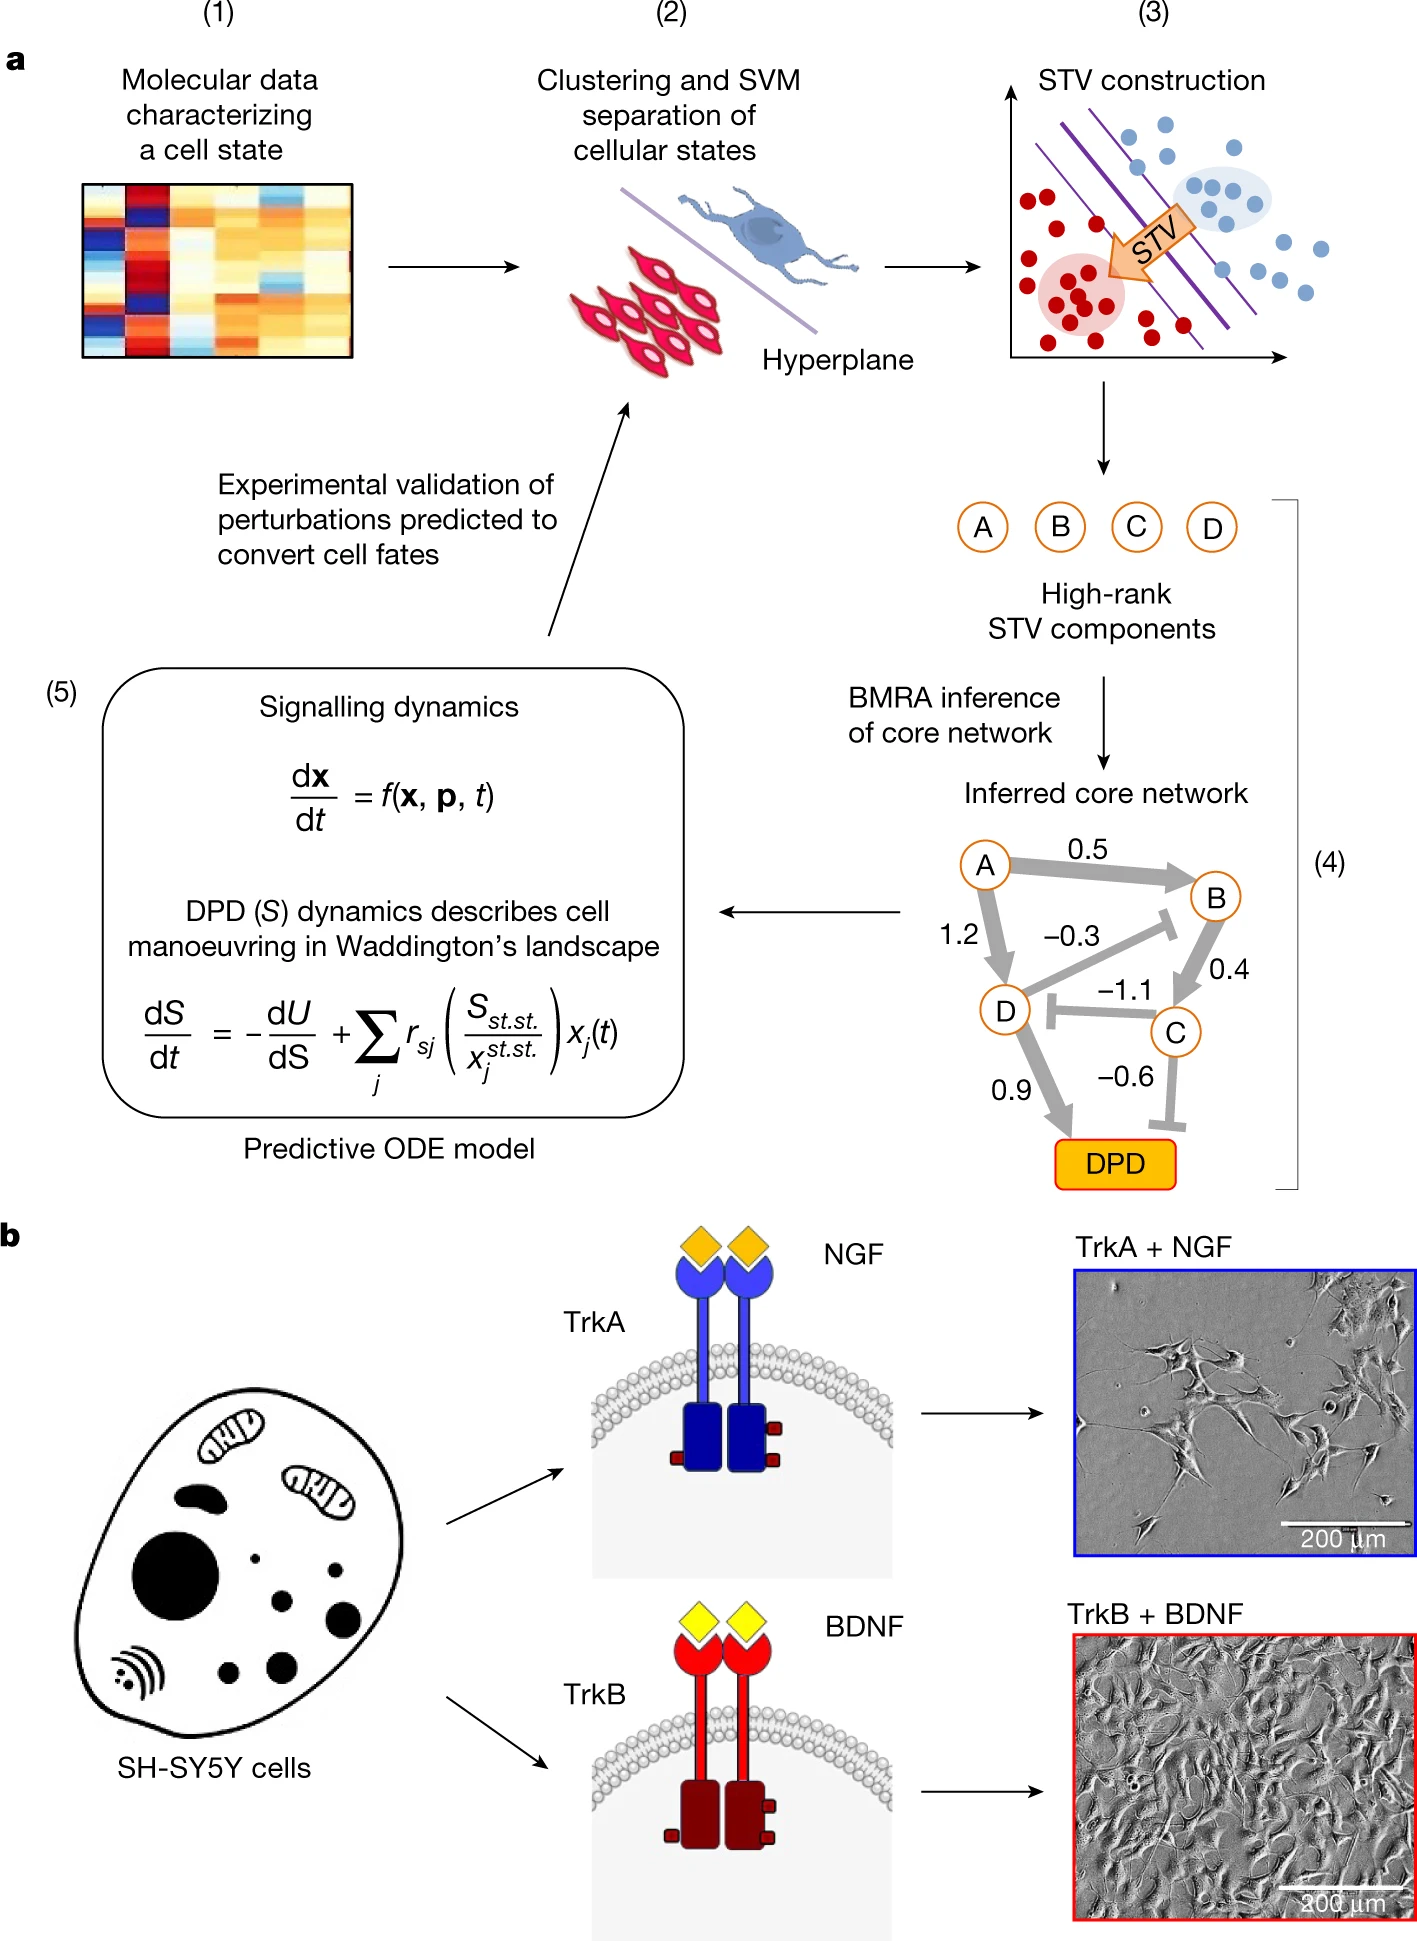

[Ссылка на статью](https://www.nature.com/articles/s41586-022-05194-y)

#  Гиперпараметры и кросс-валидация

Текст для ознакомления - <a href='https://arxiv.org/pdf/1811.12808.pdf'>Крайне рекомендуется к прочтению!</a>

Мануалы sklearn по  <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>кросс-валидации</a> тоже рекомендуются.

## Гиперпараметры

Есть параметры, а есть гиперпараметры.

<b>Параметры</b> - т.н. "веса" модели, т.е. то, что подбирается во время обучения. <br>

Например, у нас есть N признаков и мы строим на них линейную регрессию

$$y = w_0 + w_1 x_1 + w_2x_2 +~...~+ w_n x_n$$

В этом случае параметры, это веса $w_i$

В случае SVM параметрами будут веса $c_i$ объектов из тренировочной выборки



<b>Гиперпараметры</b> - те характеристики модели, которые фиксируются до обучения, влияют на процесс обучения, и не меняются сами во время обучения.

Например, мы уже знакомы с гиперпараметром <b>k в алгоритме kNN</b> и гиперпараметром <b>C</b>  SVM.

<img src="https://www.dropbox.com/scl/fi/9clfp5139hgrvjk26fv8o/1_2zYNhLc522h0zftD1zDh2g.png?rlkey=46tizcvzcywdrkkt1rjslslo5&st=qwjexafo&dl=1" width="300">

## Напоминание из статистики

Задача статистики - на основании выборки из генеральной совокупности оценить параметры генеральной совокупности (**inference**)

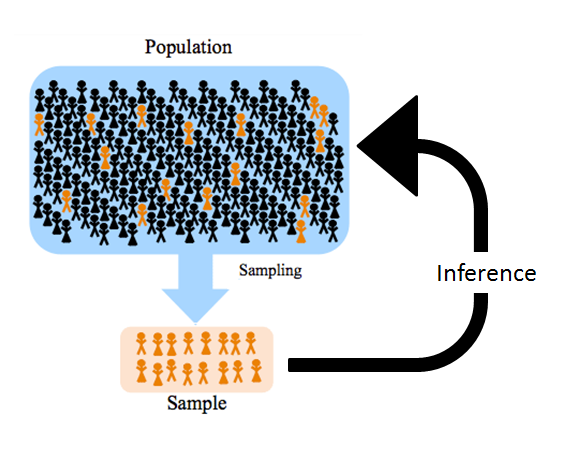

Задача машинного обучения - на основании выборки из генеральной совокупности научиться предсказывать некую характеристику/набор характеристик для любого объекта из генеральной совокупности

## Разбиение данных

Помните, как примерно выглядит пайплайн в машинном обучении?

1. Предобработать данные
2. Обучить модель
3. **Оценить ее качество на генеральной совокупности** - как?
4. Повторить шаги 2-3 пока не получим модель с хорошим качеством
5. **Финально оценить качество полученной модели на генеральной совокупности** - как?

<b>Во время процесса получения оптимальной модели встаёт множество вопросов:</b>

* Какие значения гиперпараметров оптимальные?
* Какой набор признаков позволяет достичь наибольшего качества?
* Как корректно сравнивать разные обученные модели между собой?
* Как, в конце концов, оценить обобщающую способность модели?

Для получения корректных ответов на все эти вопросы сначала необходимо построить правильную схему разбиения данных.

### Все - train

> With four parameters I can fit an elephant, and with five I can make him wiggle his trunk!

[Источник](https://fermatslibrary.com/s/drawing-an-elephant-with-four-complex-parameters)


Будем учить модель и тестировать на них же


In [ ]:
X = [0, 1, 2, -2, -3, 5, -6]
Y = [0, 1, 4, 4, 9, 25, 36]

Возьмем модель - **словарь**

In [ ]:
dt = {}
for x, y in zip(X, Y):
    dt[x] = y
dt

{0: 0, 1: 1, 2: 4, -2: 4, -3: 9, 5: 25, -6: 36}

Какое качество на обучающей выборке?

In [ ]:
err = 0
for x, y in zip(X, Y):
    y_pred = dt[x]
    err += (y - y_pred) ** 2
print(err)

0


Идеальное, а как с генерализацией?

In [ ]:
dt[3]

KeyError: 3

Грустно

### Train-test split


То, что не забывают делать (почти) все.

Разделим данные на обучающую выборку и тестовую.

Учим модель на обучающей выборке, тестируем - на тестовой


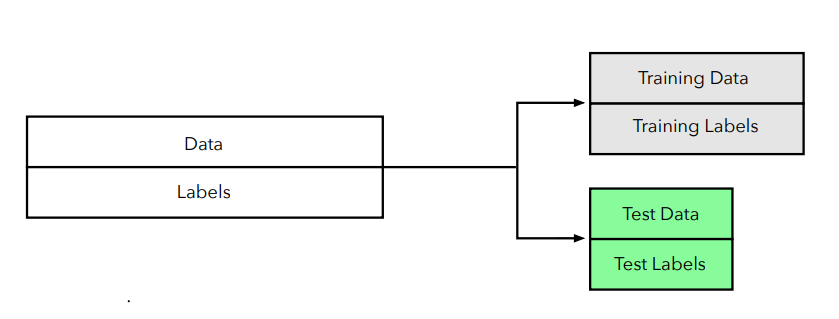

Как бить?

1. **Случайное разбиение** - можно, мы уже делали.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

2. **Стратифициованная выборка**

Бьем так, чтобы соотношение значений целевой переменной (y) была одинаковым в train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_selected, patients['State'], test_size=0.3,
                                                    stratify=patients['State'], random_state=43)

Может НЕ отражать того, что мы ожидаем в реальности. Часто получаем завышенную оценку качества

В обоих предыдущих случаях мы не избегаем **data leakage** - ситуации, когда модель учится предсказывать не зависимость, которую мы хотим, а находит способ хитрить, обходясь запоминанием учебной выборки

**3. Разбиение, опирающееся на знания о домене, в котором вы работаете**

Для каждого домена - свои особенности. Рассмотрим позже

### Почему нельзя сделать трейн-тест сплит и подбирать гиперпараметры на тесте?

В таком сценарии происходит переобучение на тестовый датасет, и он по сути превращается в тренировочный для гиперпараметров.

Покажем это

Представим себе, что у нас есть 10000 моделей, полученных подкручиванием разных гиперпараметров. Представим, что все эти модели не работают, т.е. представляют из себя случайное угадывание.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import warnings


warnings.filterwarnings('ignore')

# случайные модельки просто угадывают случайные данные
def guess_model(y_real, seed=777):
    np.random.seed(seed)
    guessed = np.random.choice([True, False],
                               size=y_real.shape[0],
                               replace=True)
    y_predicted = np.zeros_like(y_real)
    y_predicted[guessed] = y_real[guessed]
    y_predicted[~guessed] = 1 - y_real[~guessed]
    return y_predicted

In [ ]:
np.random.seed(777)
y_real = np.random.choice([0,1], size=250, replace=True)

In [ ]:
import tqdm

In [ ]:
models_num = 10000
best_quality = 0.5

seeds = np.arange(0, models_num)

best_seed = -1
for i in tqdm.tqdm(range(models_num)):
    y_pred = guess_model(y_real, seed=seeds[i])
    q = accuracy_score(y_pred=y_pred, y_true=y_real)
    if q > best_quality:
        best_quality = q
        best_seed = seeds[i]

100%|██████████| 10000/10000 [00:07<00:00, 1356.21it/s]


In [ ]:
print(best_quality, best_seed)

0.624 5554


Допустили утечку информации из test в наши гиперпараметры.

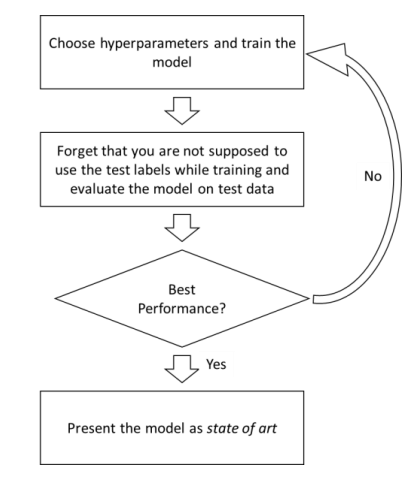

Крутая статья про эту и многие другие ошибки - [Ten ways to fool the masses with machine learning](https://arxiv.org/abs/1901.01686)

Путём подкручивания гиперпараметров на тесте можно получить какой-то мнимый результат, когда модель не рабочая.

#### Следствие 1

Если много людей мучают один и тот же датасет - то что-нибудь получится

> При достаточном долгом переборе среди похожих сущностей, можно найти сущность с нужном качеством на тестовом датасете, при этом являющую собой исключительно нерабочую вещь

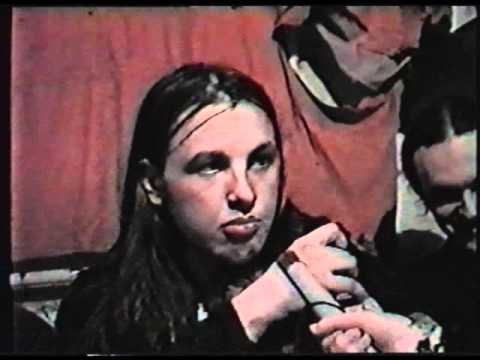

**Решение** - проведение конкурсов на принципиально новых данных. Например, [CASP](https://predictioncenter.org/)

## Holdout Validation (проверка на отложенной выборке)

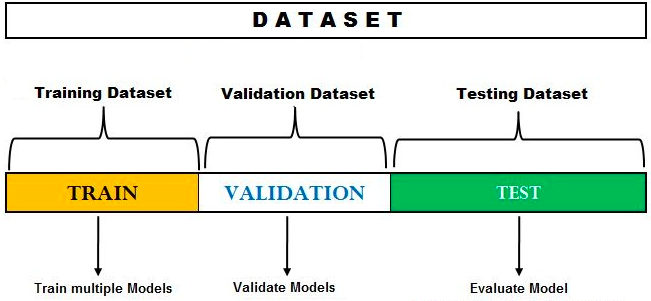

Просто разбиваем не на 2, а на 3 датасета

Предобработаем данные

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
del breast_cancer

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=203,
                                                  stratify=y_train_full)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Переберем много гиперпараметров

In [ ]:
knn_train_auroc = []
knn_val_auroc = []
sc_train_auroc = []
sc_val_auroc = []

neighbors = np.arange(1, 51, 1)
for knei in neighbors:
    knn = KNeighborsClassifier(n_neighbors=knei)
    knn.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=knn.predict_proba(X_train)[:, 1])
    knn_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=knn.predict_proba(X_val)[:, 1])
    knn_val_auroc.append(val_au)

regularization = np.arange(0.001, 10, 0.5)
for C in regularization:
    sc = SVC(random_state=1, C=C, probability=True)
    sc.fit(X_train, y_train)
    tr_au = roc_auc_score(y_train, y_score=sc.predict_proba(X_train)[:, 1])
    sc_train_auroc.append(tr_au)
    val_au = roc_auc_score(y_val, y_score=sc.predict_proba(X_val)[:, 1])
    sc_val_auroc.append(val_au)

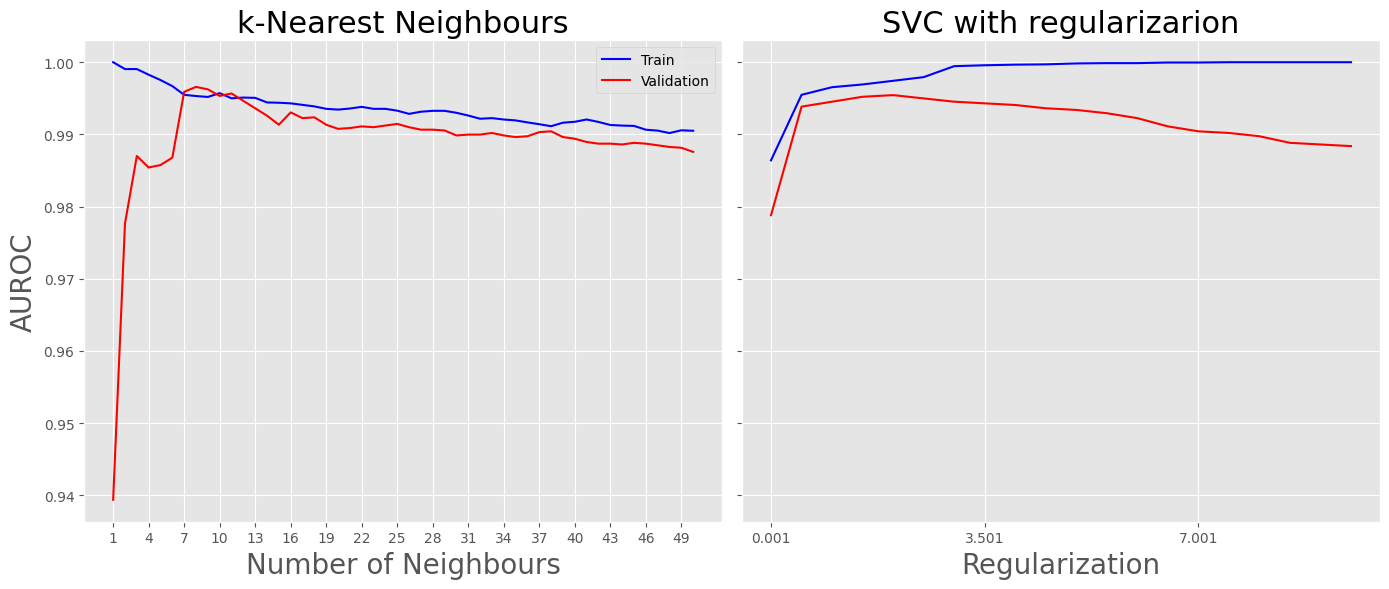

In [ ]:
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    ax1.set_title('k-Nearest Neighbours', size=22)
    ax1.set_ylabel("AUROC", size=20)
    ax1.set_xlabel("Number of Neighbours", size=20)
    ax1.set_xticks(neighbors[::3])
    ax1.plot(neighbors, knn_train_auroc, c="b", label="Train")
    ax1.plot(neighbors, knn_val_auroc, c="r", label="Validation")
    ax1.legend()
    ax2.set_title('SVC with regularizarion', size=22)
    ax2.set_xlabel('Regularization', size=20)
    ax2.set_xticks(regularization[::7])
    ax2.plot(regularization, sc_train_auroc, c='b', label='Train')
    ax2.plot(regularization, sc_val_auroc, c='r', label='Validation')
    fig.tight_layout()

In [ ]:
max(knn_val_auroc), max(sc_val_auroc)

(0.9965800273597811, 0.9954400364797081)

KNN выиграл

In [ ]:
neighbors[np.argmax(knn_val_auroc)]

8

Выбрали оптимальные гиперпараметры, а теперь уже проводим итоговую оценку на тестовой датасете

In [ ]:
# Final evaluation

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_score=knn.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9899140211640212

### Плюсы

* Ура, получили какую-то оценку. Для больших датасетов хватает и этого подхода для получения оценки алгоритма

### Минусы

* Точечная оценка (делаем вывод по одному случайному разбиению), причём чем меньше примеров в валидационном наборе, тем выше
дисперсия. Чем больше примеров - тем меньше примеров остается для обучения модели
* Снижение размера данных, которые попадают в модель при обучении.

## Monte-Carlo cross-validation

Повторение процедуры holdout несколько раз. Есть варианты, когда на каждой итерации варьируется размер валидационной выборки.

## поправить test на валидацию

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/montecarlo_val.png" width="500">

Можно использовать <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html'>ShuffleSplit</a> и <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html'>StratifiedShuffleSplit</a> из sklearn.model_selection, можно наколхозить.<br>
Если нарушается i.i.d., то существует <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html'>GroupShuffleSplit</a>.

<b>Учтите!</b><br>
Здесь и дальше манипуляции с признаками (шкалирование и пр.) надо производить внутри цикла. Нормализация (и другие сходные операции) по всему датасету приведёт к переобучению (вы показываете модели больший кусок распределения, чем есть в обучающей выборке).

In [ ]:
def get_monte_carlo_cv_scores(X, y, clf, n_samples,
                              test_size='random', random_state=12345):
    rng = np.random.RandomState(seed=random_state)
    seeds = np.arange(10**5)
    rng.shuffle(seeds)
    seeds = seeds[:n_samples]
    auroc_mccv = []
    if test_size == 'random':
        sizes = rng.choice(np.linspace(0.05, 0.5, 46),
                           size=n_samples, replace=True)
        for i, size in zip(seeds, sizes):
            X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                              test_size=size,
                                                              random_state=i,
                                                              stratify=y)
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            y_score = clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]
            auroc = roc_auc_score(y_true=y_val, y_score=y_score)
            auroc_mccv.append(auroc)
    elif isinstance(test_size, float):
        for i in seeds:
            X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                              test_size=test_size,
                                                              random_state=i,
                                                              stratify=y)
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_val = scaler.transform(X_val)
            y_score = clf.fit(X_train, y_train).predict_proba(X_val)[:, 1]
            auroc = roc_auc_score(y_true=y_val, y_score=y_score)
            auroc_mccv.append(auroc)
    else:
        return 'Wrong test_size type. Must be string ("random") or float'
    return np.array(auroc_mccv)

In [ ]:
def plot_mccv_results(auroc, title):
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(12, 6))
        plt.title(title, size=22)
        plt.bar(range(0, auroc.shape[0]), auroc, color='gray', alpha=0.7)
        plt.axhline(auroc.max(), color='k', linewidth=1, linestyle='--')
        plt.axhline(auroc.min(), color='k', linewidth=1, linestyle='--')
        plt.axhspan(auroc.min(), auroc.max(), alpha=0.2, color='steelblue')
        plt.ylim([0, auroc.max() + 0.1])
        plt.xlabel('Repetition')
        plt.ylabel('AUROC')
        plt.ylim([0.5, 1.0])
        plt.tight_layout()
        plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100,
                                                    stratify=y)

clf = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

auroc_mccv_50 = get_monte_carlo_cv_scores(X_train, y_train, clf, 100, .5)
auroc_mccv_10 = get_monte_carlo_cv_scores(X_train, y_train, clf, 100, .1)
auroc_mccv_random = get_monte_carlo_cv_scores(X_train, y_train, clf, 100)

In [ ]:
auroc_mccv_50.mean(), auroc_mccv_10.mean(), auroc_mccv_random.mean()

(0.969702591526121, 0.973367139959432, 0.9717028934358618)

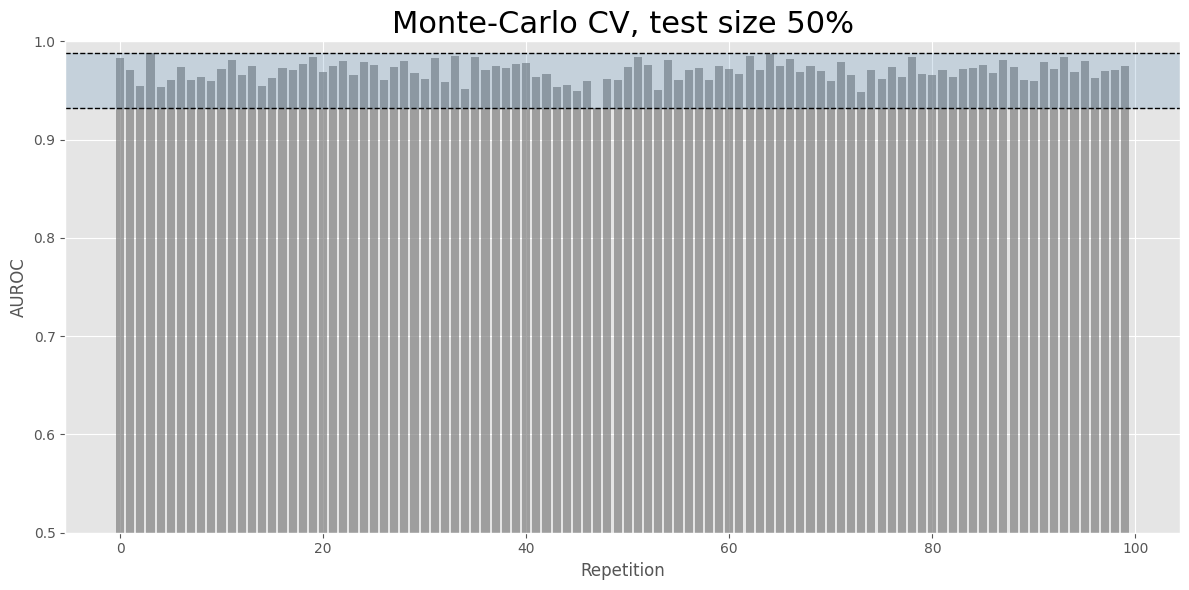

In [ ]:
plot_mccv_results(auroc_mccv_50, 'Monte-Carlo CV, test size 50%')

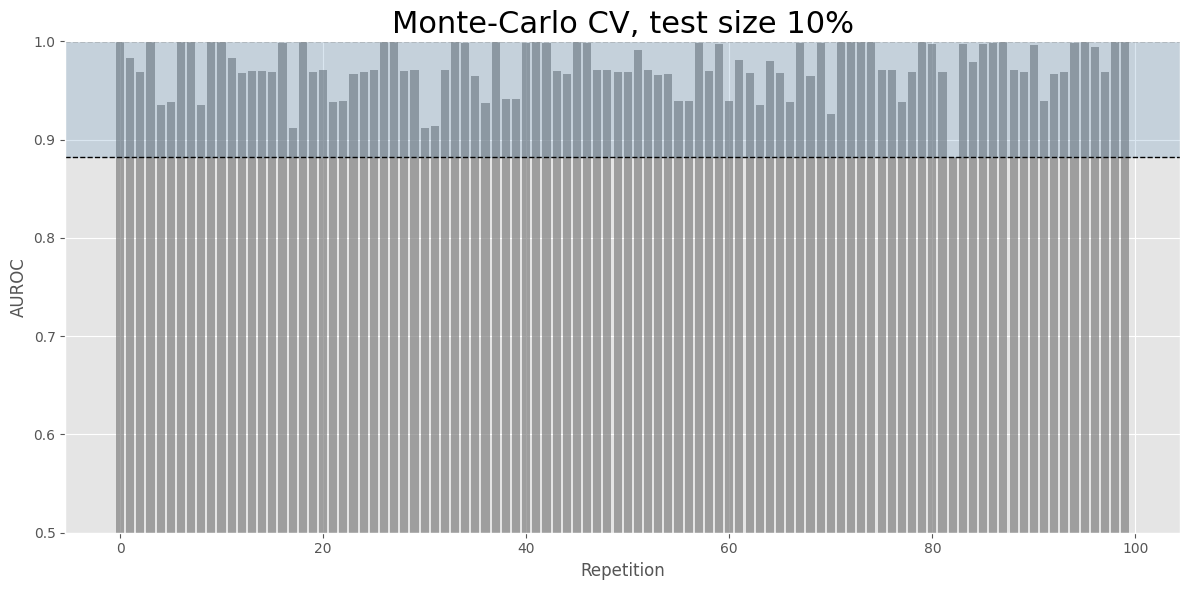

In [ ]:
plot_mccv_results(auroc_mccv_10, 'Monte-Carlo CV, test size 10%')

### Плюсы

* Получаем массив оценок, можно оценить дисперсию оценки, строить интервалы, применять статтесты и пр.;
* Более гибкая схема валидации, можно придумать свои модификации этого метода (например, зашумлять объекты - аугментация данных).

### Минусы

* Нет гарантии, что каждый объект попадёт в обучение;
* Надо обучать алгоритм много раз, может быть трудоёмко по времени.

## K-Fold cross-validation

В общем виде выглядит вот так:

![cv-scheme](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Крайние примеры - leave-one-out (LOO, n разбиений, в тестовую выборку попадает по одному объекту) и 2-fold (два разбиения 50/50).


В sklearn.model_selection реализованы многие модификации метода:

* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>KFold</a> - классическая схема;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html'>StratifiedKFold</a> - k разбиений со стратификацией по меткам классов;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html'>GroupKFold</a> - k блоков с учётом групп для задач с нарушением i.i.d. (наличием multiple sources);
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html'>LeaveOneOut</a> - классический LOO;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePOut.html'>LeavePOut</a> - в тест попадают все возможные наборы из p объектов (всего $C_n^p$)
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html'>LeaveOneGroupOut</a> - LOO для multiple sources;
* <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePGroupsOut.html'>LeavePGroupsOut</a> - LPO для mutiple sources.
* некоторые другие.

In [ ]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=100, stratify=y)

clf = LogisticRegression(random_state=1)
skf_scores = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for train_index, test_index in cv.split(X_train, y_train):
    X_train_, y_train_ = X_train[train_index], y_train[train_index]
    X_val, y_val = X_train[test_index], y_train[test_index]
    scaler = StandardScaler().fit(X_train_)
    X_train_ = scaler.transform(X_train_)
    X_val = scaler.transform(X_val)
    clf.fit(X_train_, y_train_)
    pred = clf.predict_proba(X_val)[:, 1]
    skf_scores.append(roc_auc_score(y_val, pred))
skf_scores = np.array(skf_scores)

In [ ]:
skf_scores.mean(), skf_scores.std()

(0.9921568627450981, 0.00735108516759884)

### Плюсы
* Гарантия попадания каждого объекта и в трейн, и в тест;
* Получаем массив оценок;
* Гибкость.

### Минусы

* Непонятно, сколько блоков брать (чаще всего - 5 или 10, но очень зависит от данных и задачи);
* Опять надо обучаться много раз (в случае LPO - очень много), может быть трудоёмко по времени;
* В случае LOO - высокая дисперсия оценки, невозможность подсчитать некоторые метрики (тот же AUROC). Часть метрик для большого числа объектов можно высчитать аналитически - валидация фактически не работает

# Особенности валидации с биологическими данными

### Train-test split

На прошлых занятиях мы использовали следующую схему разбиения

<img src="https://www.dropbox.com/scl/fi/ydrsehkngrn4v1gnywqx9/splitting-data.png?rlkey=u1l1qznwocmtrsw7bdyqjdf9x&st=u8b556jr&dl=1" width="500">

Оно предполагает, что мы наши данные **независимы**. Нет копий каких-то объектов, нет зашумленных версий каких-то объектов  и т.д.

Если это не выполняется - то наша оценка качества модели сильно проседает.

Для биологических данных постоянно нарушается предположение о том, что объекты в выборке, которую мы получили - независимы.





## Медицинские изображения

Проблема с правильной кросс-валидацией [указывается](https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/), в числе прочих, и среди причин невозможности применения кучи опубликованных моделей для реальной диагностики ковида.

Более того, много статей, к примеру - [из недавних](https://www.nature.com/articles/s42256-021-00307-0) - посвящено тому, как правильно делать исследование на медицинских изображениях. И там упоминается и проблема кроссвалидации.



В снимках могут быть фотографии, полученные от одного пациента. Могут быть снимки с одного прибора, окрашенные одним и тем же специфичным способом и т.д.

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/cross_patient.png" width="500">



## Cross-chromosome и cross-cell validation



Когда мы делаем предсказания на геномных данных, необходимо быть ОЧЕНЬ внимательным.

Многие сигналы, такие как доступность хроматина, опасность мутаций в позиции и т.д обладают выраженной локальностью - по рядом стоящей позиции можно с большой достоверностью предсказать значение в текущей позиции.

Некоторые сигналы более-менее сохраняют свое значение на больших участках генома, а модели машинного обучения склонны легко запоминать конкретные последовательности и "составлять" внутри себя карту генома.


Представим себе ситуацию, что у нас есть данные двух клеточных линий для всех хромосом

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross0.png" width="600">

Как мы можем разбить наши данные на обучение и тест?

### Случайное разбиение

Не рекомендуется - модель почти наверняка переобучится

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross1.png" width="600">

### Разбиение по клеточным линиям

Лучше, но надо сравниваться с предсказанием среднего по линиям, на которых училась модель

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross2.png" width="600">

### Разбиение по хромосомам

Хороший вариант, ловит почти все проблемы

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/genome_cross3.png" width="600">

## Примеры неудачных разбиений


Ниже истории про то, как люди облажались не сделав разбиение по хромосомам.

### TargetFinder

Одна из крупных историй про то, как люди облажались не сделав разбиение по хромосомам.

Представим себе следующую задачу:
1) дана последовательность энхансера
2) дана последовательность промотора
3) предсказать, будут ли они взаимодействовать

Автор TargetFinder в данной задаче смогли добиться точности порядка 99% процентов. Кажется подозрительным.

И в скором времени вышла статья, где было показано, что все качество авторов происходит из-за неправильного разбиения данных.
В выборку попадали последовательности из одной и той же хромосомы, более того, один и тот же промотор/энхансер могли быть как в обучении, так и в тесте.

Признаки, которые они предложили, позволяли модели легко запоминать конкретные промоторы и энхансеры, понимать, что лежит в окружении того или иного регуляторного участка.

Как было показано, что в модели есть проблемы - просто предложили два разбиения - кросс-хромосомное, когда в тест попадали пары промотор-энхансер только с одних хромосом, а в трейн - с других.

И второе - где хотя бы гарантировалось, что один и тот же промотор будет либо только в тесте, либо только в обучении.

Второе разбиение было более мягким - на нем модель все равно находила "как переобучиться". На кросс-хромосомном уровне data leakage убирался полностью.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/crosschromosome.png" width="700">


### A pitfall for machine learning methods aiming to predict across cell types

Аналогичный эффект был [продемонстрирован](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02177-y) при попытке обучить модель, предсказывающую, какие гены будут значимо экспрессироваться в клеточной линии. "Лучшим" предсказанием сигнала для определенной клеточной линии оказывается просто предсказание для данного гена среднего по остальным клеточным линиям.

Модель же "стремится" к идеалу - чем больше ей дается параметров, тем лучше она запоминает и тем больше ее предсказание становится похоже на среднее

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/expression.png" width="700">

### Avocado

В [статье](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-01977-6) используют неправильные разбиения, что были еще в TargetFinder

![alttext](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs13059-020-01977-6/MediaObjects/13059_2020_1977_Fig5_HTML.png?as=webp)

### CAGI2018

Авторы конкурса недооценили размер блоков, на которые надо резать геномные данные (**A**) и в итоге модель учила не признаки, важные для предсказания эффекта мутации, а призниак, важные для предсказания, какой объект из обучающей выборки был ближе **по геному**.

Соответственно, при правильных разбиениях большая часть моделей [показывали](https://www.frontiersin.org/articles/10.3389/fgene.2019.01078/full) куда меньшее качество и были не переносимы на реальные данные, где все последовательности относятся к тем, которые модели не видели

<img src="https://www.frontiersin.org/files/Articles/485085/fgene-10-01078-HTML/image_m/fgene-10-01078-g001.jpg" width="600">

В результате, даже модель, обученная на абсолютно случайных признаках, показывала качество лучше многих конкурсных решений

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/cagi2018_fakesig.png" width="500">

## Разбиение химических веществ

### Разные разбиения - разные результаты

Аналогичная проблема может возникнуть и при разбиении химических веществ.

Допустим, что вы хотите предсказывать связывание белка с веществом

В [статье](https://arxiv.org/abs/1703.10603) приводят пример, что в зависимости от того, как разбить комплексы белков с веществами на обучение и тест, оценка качества может меняться очень разными путями.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/chemsplit.png" width="700">

### Датасеты могут быть разные по качеству

Бывают хорошие датасеты, где для каждого белка известны как ингибиторы, так и вещества ими неявляющимися. И для каждого вещества известны и белки, с которыми оно связывается, и с которыми нет.
В этом случае может повезти - и любое разбиение будет давать вам хорошее качество

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/chembase1.png" width="700">





Бывают же датасеты, где для каких-то веществ изввестны только белки, которые они ингибируют (ученые любят сообщать об успехах, а не о неудачах) или белки, для которых известны только ингибиторы (или ингибиторов неизвестно).

В этом случае без правильного разбиения - хорошо оценить качество модели не получится.

### Разбиение по веществу

Информация про одно и то же вещество идет либо только в обучение, либо только в тест.

### Разбиение по scaffold

Разбиение по структуре вещества. Например, на основании [Bemis-Murcko scaffold](https://docs.chemaxon.com/display/docs/bemis-murcko-clustering.md)


<img src="https://kodomo.fbb.msu.ru/FBB/year_21/bemismurko_scaf.jpeg" width="500">

### Разбиение по белку

Комплексы одного и того же белка идут либо только в обучении, либо в тест.

### Разбиение по семействам

Есть разные разбиения белков на классы по похожести.

Можем брать белки из одного класса либо только в обучение, либо только в тест. Или можно напрямую контролировать, чтобы похожесть между последовательностями в обучении и тесте не была больше заданного порога



![alttext](https://www.dropbox.com/scl/fi/sp5x30sxx4mvfy53yzxel/8-Figure3-1.png?rlkey=28cl95bneh494kh701ioug4nt&st=u3qiuwup&dl=1)

## Медицинские записи

В медицинских записях так же [могут](https://www.sciencedirect.com/science/article/pii/S153204641830073X) встречаться полные дупликаты или почти-дупликаты. Если не очистить датасет от них предварительно или не обеспечить праавильного разбиения - получится неправильная оценка качества модели

<img src="https://www.dropbox.com/scl/fi/08iqco45mm9fr1olfihsf/1-s2.0-S153204641830073X-fx1_lrg.jpg?rlkey=bvfv9y7elu356ltyfiievuhjw&st=87kaeuky&dl=1" width="600">

## Общая рекомендация

Всегда думайте, что в Вашей задаче является источником распределения, генерирующего данные. Отсюда вытекают cross-chromosome, cross-cell line, cross-patient и прочие валидации...